### Connect to google drive

In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# Need to set appropriate folder name
FOLDERNAME = '2022SansumgResearch/tigramite-master'

assert FOLDERNAME is not None, "[!] Enter the foldername."

%cd /content/drive/MyDrive/$FOLDERNAME

Mounted at /content/drive
/content/drive/MyDrive/2022SansumgResearch/tigramite-master


### Install tigramite(pcmci package) and requirements

In [2]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing tigramite.egg-info/PKG-INFO
writing dependency_links to tigramite.egg-info/dependency_links.txt
writing requirements to tigramite.egg-info/requires.txt
writing top-level names to tigramite.egg-info/top_level.txt
reading manifest file 'tigramite.egg-info/SOURCES.txt'
writing manifest file 'tigramite.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/tigramite
copying build/lib/tigramite/lpcmci.py -> build/bdist.linux-x86_64/egg/tigramite
copying build/lib/tigramite/data_processing.py -> build/bdist.linux-x86_64/egg/tigramite
copying build/lib/tigrami

In [3]:
!python -m pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 28.2 MB/s 
     |████████████████████████████████| 957 kB 61.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


### Import packages

In [3]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline     

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.lpcmci import LPCMCI
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr #, GPDC, CMIknn, CMIsymb

/content/drive/MyDrive/2022SansumgResearch/tigramite-master/tigramite/plotting.py:26: UserWarning: ('Version mismatch. Installed version of matplotlib', '3.2.2', 'Please install matplotlib>=', '3.4.0')
  warnings.warn(str(e))
/content/drive/MyDrive/2022SansumgResearch/tigramite-master/tigramite/independence_tests/gpdc.py:27: UserWarning: No module named 'dcor'
  warnings.warn(str(e))
/content/drive/MyDrive/2022SansumgResearch/tigramite-master/tigramite/independence_tests/gpdc_torch.py:33: UserWarning: No module named 'dcor'
  warnings.warn(str(e))


### Dataset load and preprocessing

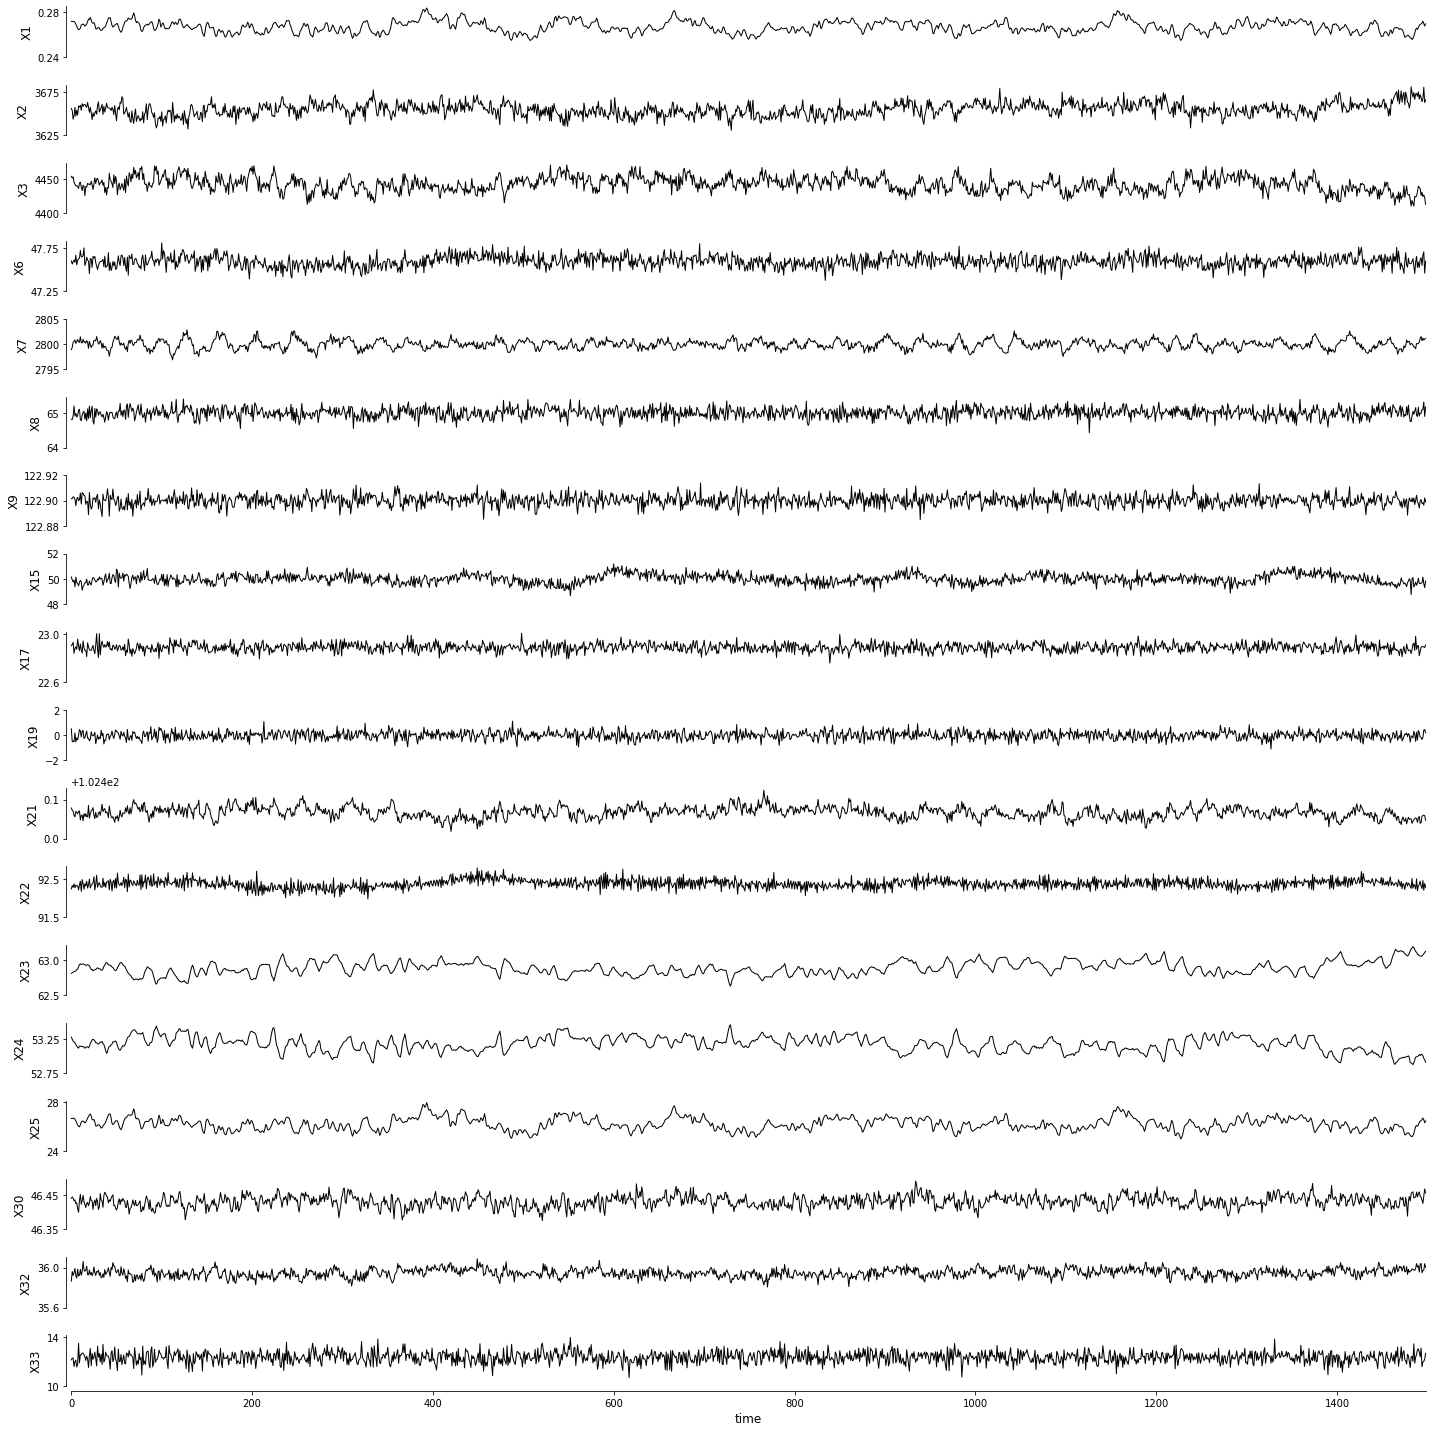

In [4]:
# Read data from csv
data_dir = './TenneseeEastman/datasetTE.csv'
data_csv = pd.read_csv(data_dir, header=0)

data_idx_list = []
for i in range(1, 34):
  data_idx_list.append('X' + str(i))

# remove variables
data_idx_list.remove('X4')
data_idx_list.remove('X5')
data_idx_list.remove('X10')
data_idx_list.remove('X11')
data_idx_list.remove('X12')
data_idx_list.remove('X13')
data_idx_list.remove('X14')
data_idx_list.remove('X16')
data_idx_list.remove('X18')
data_idx_list.remove('X20')
data_idx_list.remove('X26')
data_idx_list.remove('X27')
data_idx_list.remove('X28')
data_idx_list.remove('X29')
data_idx_list.remove('X31')

# data_obs is observed variables (which is the actual input)
data_obs = data_csv.loc[:, data_idx_list]
dataframe = pp.DataFrame(data_obs.to_numpy(), var_names=data_idx_list)
tp.plot_timeseries(dataframe, figsize=(20, 20));
plt.show()

### Independence Test


##
## Running Tigramite BivCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


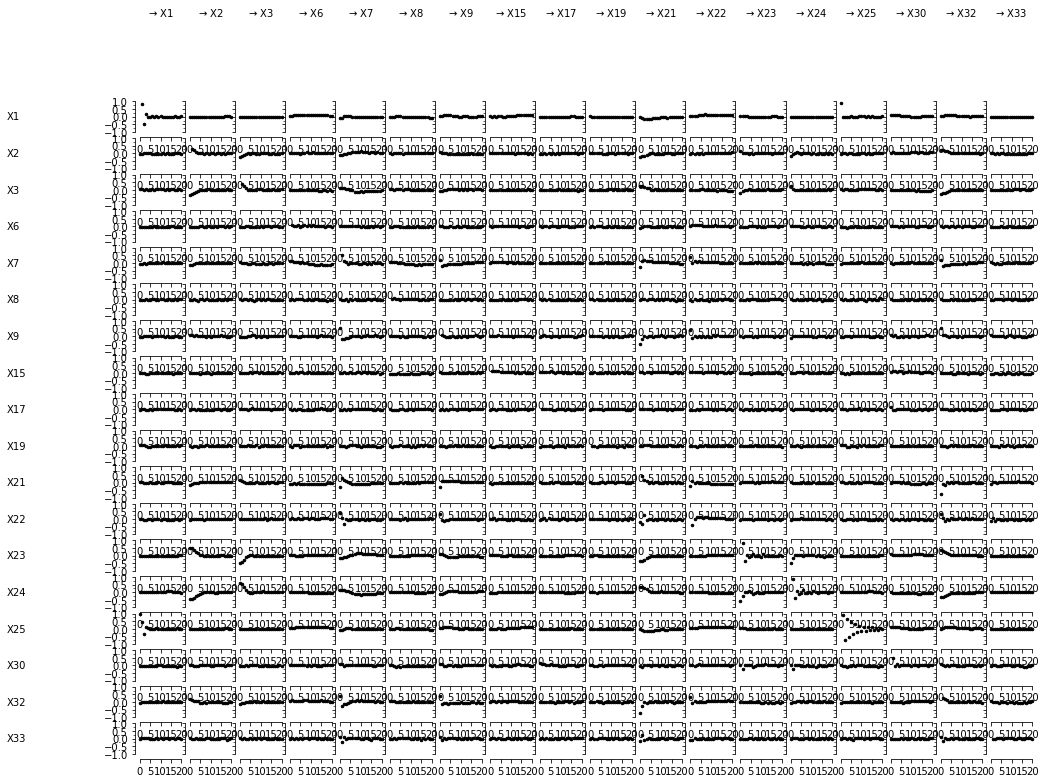

In [5]:
# Create a (conditional) independence test object
# Here, the partial correlation test is used
parcorr = ParCorr(significance='analytic')

# Create a PCMCI object, passing the the dataframe and (conditional)
# independence test object.
pcmci = PCMCI(dataframe=dataframe, 
              cond_ind_test=parcorr,
              verbosity=1)

# Run the `PCMCI.run_bivci` function
correlations = pcmci.run_bivci(tau_max=20, val_only=True)['val_matrix']

# Plot the results
# BivCI test is useful for setting 'tau_max' (maximum lag time)
# Appropriate lag time should be longer than the decay time (the effect of other variables disappear)
# However, long lag time require long run time, and has a posibility of non-convergence
setup_args = {'var_names':data_idx_list,
              'figsize':(16, 12),
              'x_base':5,
              'y_base':.5}
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, 
                                   setup_args=setup_args)


### Run LPCMCI

In [8]:
# Create a (conditional) independence test object
# Here, the partial correlation test is used
parcorr = ParCorr(significance='analytic')

# Create a LPCMCI object, passing the dataframe and (conditional)
# independence test objects.
# parcorr = ParCorr(significance='analytic')
lpcmci = LPCMCI(dataframe=dataframe, 
                cond_ind_test=parcorr,
                verbosity=1)

# Define the analysis parameters.
tau_max = 2
pc_alpha = 0.02

# Run LPCMCI
results = lpcmci.run_lpcmci(tau_max=tau_max,
                            pc_alpha=pc_alpha)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Writing:   (17,-2) oL> (3, 0) ==> (17,-2)     (3, 0) 
Writing:   (6,-2) oL> (4, 0) ==> (6,-2)     (4, 0) 
Writing:   (7,-2) oL> (4, 0) ==> (7,-2)     (4, 0) 
Writing:   (8,-2) oL> (4, 0) ==> (8,-2)     (4, 0) 
Writing:   (9,-2) oL> (4, 0) ==> (9,-2)     (4, 0) 
Writing:   (10,-2) oL> (4, 0) ==> (10,-2)     (4, 0) 
Writing:   (15,-2) oL> (4, 0) ==> (15,-2)     (4, 0) 
Writing:   (16,-2) oL> (4, 0) ==> (16,-2)     (4, 0) 
Writing:   (17,-2) oL> (4, 0) ==> (17,-2)     (4, 0) 
Writing:   (0,-2) oL> (5, 0) ==> (0,-2)     (5, 0) 
Writing:   (1,-2) oL> (5, 0) ==> (1,-2)     (5, 0) 
Writing:   (2,-2) oL> (5, 0) ==> (2,-2)     (5, 0) 
Writing:   (3,-2) oL> (5, 0) ==> (3,-2)     (5, 0) 
Writing:   (6,-2) oL> (5, 0) ==> (6,-2)     (5, 0) 
Writing:   (8,-2) oL> (5, 0) ==> (8,-2)     (5, 0) 
Writing:   (9,-2) oL> (5, 0) ==> (9,-2)     (5, 0) 
Writing:   (10,-2) oL> (5, 0) ==> (10,-2)     (5, 0) 
Writing:   (11,-2) oL> (5, 0) ==> (11,-2)     (5, 0) 
Writing:   (12